# 戴明回归（Deming Regression）
---

本节介绍如何使用 Tensorflow 进行线性戴明回归。$$y=Ax+b$$

我们使用 iris 数据，具体来说：

$y = Sepal Length$

$x = Petal Width$

戴明回归也被称为最小二乘法，它最小化了实际点集（x, y）与预测线的最短距离。

如果说最小二乘线性回归最小化点集到线路的垂直距离，戴明回归最小化点集到线路的总距离。这种回归最小化了y值和x值的误差。参见下图进行比较。

![05](05_demming_vs_linear_reg.png)

为在 Tensorflow 中实现戴明回归，我们码之：

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn import datasets
from tensorflow.python.framework import ops
ops.reset_default_graph()

启动图（会话）

In [2]:
sess = tf.Session()

加载 iris 数据

In [3]:
# Load the data
# iris.data = [(Sepal Length, Sepal Width, Petal Length, Petal Width)]
iris = datasets.load_iris()
x_vals = np.array([x[3] for x in iris.data]) # Petal Width
y_vals = np.array([y[0] for y in iris.data]) # Sepal Length

接下来我们声明批量大小，模型占位符，模型变量和模型操作。

In [4]:
# Declare batch size
batch_size = 125

# Initialize placeholders
x_data = tf.placeholder(shape=[None, 1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None, 1], dtype=tf.float32)

# Create variables for linear regression
A = tf.Variable(tf.random_normal(shape=[1, 1]))
b = tf.Variable(tf.random_normal(shape=[1, 1]))

# Declare model oprations
model_output = tf.add(tf.matmul(x_data, A), b)

对于戴明损失，我们通过计算：$$\frac{\left|A \cdot x + b - y \right|}{\sqrt{A^2 + 1}}$$

来获得点 $(x, y)$ 到线 $A \cdot x + b$ 的最短距离。

In [5]:
# Declare Deming loss function
demming_numerator = tf.abs(tf.subtract(tf.add(tf.matmul(x_data, A), b), y_target))
demming_denominator = tf.sqrt(tf.add(tf.square(A), 1))
loss = tf.reduce_mean(tf.truediv(demming_numerator, demming_denominator))

接下来声明优化函数和初始化所有的模型变量。

In [6]:
# Declare optimizer
my_opt = tf.train.GradientDescentOptimizer(0.25)
train_step = my_opt.minimize(loss)

# Initialize variables
init = tf.global_variables_initializer()
sess.run(init)

现在我们迭代训练我们的戴明回归：

In [7]:
# Training loop
loss_vec = []
for i in range(1500):
    rand_index = np.random.choice(len(x_vals), size=batch_size)
    rand_x = np.transpose([x_vals[rand_index]])
    rand_y = np.transpose([y_vals[rand_index]])
    sess.run(train_step, feed_dict={x_data: rand_x, y_target: rand_y})
    temp_loss = sess.run(loss, feed_dict={x_data: rand_x, y_target: rand_y})
    loss_vec.append(temp_loss)
    if (i+1) % 100 == 0:
        print('Step #' + str(i+1) + ' A = ' + str(sess.run(A)) + ' b = ' + str(sess.run(b)))
        print('Loss = ' + str(temp_loss))

Step #100 A = [[ 4.66099882]] b = [[-0.42800054]]
Loss = 0.529913
Step #200 A = [[ 4.40871525]] b = [[-0.08376063]]
Loss = 0.503048
Step #300 A = [[ 4.14317274]] b = [[ 0.32716805]]
Loss = 0.503168
Step #400 A = [[ 3.79107738]] b = [[ 0.76632339]]
Loss = 0.531407
Step #500 A = [[ 3.40863156]] b = [[ 1.32006097]]
Loss = 0.474852
Step #600 A = [[ 2.88439441]] b = [[ 1.98239231]]
Loss = 0.489793
Step #700 A = [[ 2.32621956]] b = [[ 2.85320091]]
Loss = 0.419735
Step #800 A = [[ 1.35490215]] b = [[ 4.13275337]]
Loss = 0.287827
Step #900 A = [[ 1.02934241]] b = [[ 4.59995079]]
Loss = 0.303334
Step #1000 A = [[ 1.0225358]] b = [[ 4.5943985]]
Loss = 0.281544
Step #1100 A = [[ 1.0114094]] b = [[ 4.61519718]]
Loss = 0.275887
Step #1200 A = [[ 1.04761398]] b = [[ 4.57552052]]
Loss = 0.255057
Step #1300 A = [[ 0.98889214]] b = [[ 4.62074947]]
Loss = 0.244442
Step #1400 A = [[ 1.02565086]] b = [[ 4.68061113]]
Loss = 0.202106
Step #1500 A = [[ 1.01795781]] b = [[ 4.60405636]]
Loss = 0.242925


获取最优系数（斜率和截距）

In [10]:
# Get the optimal coefficients
[slope] = sess.run(A)
[y_intercept] = sess.run(b)

# Get best fit line
best_fit = []
for i in x_vals:
    best_fit.append(slope*i+y_intercept)

好了，接下来使用 matplotlib 来绘制最佳拟合戴明回归线和戴明损失。

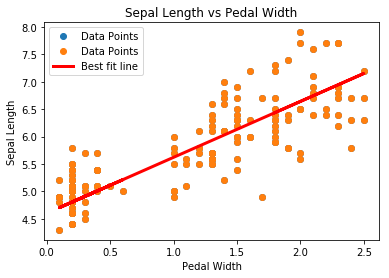

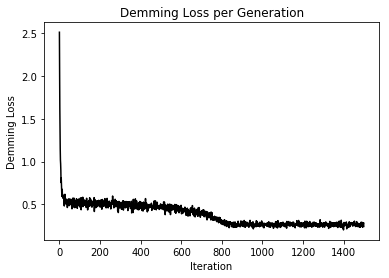

In [11]:
# Plot the result
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='Best fit line', linewidth=3)
plt.legend(loc='upper left')
plt.title('Sepal Length vs Pedal Width')
plt.xlabel('Pedal Width')
plt.ylabel('Sepal Length')
plt.show()

# Plot loss over time
plt.plot(loss_vec, 'k-')
plt.title('Demming Loss per Generation')
plt.xlabel('Iteration')
plt.ylabel('Demming Loss')
plt.show()